In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestRegressor
from sklearn import metrics

In [2]:
#Data Collection and Processing

In [3]:
#Loading csv data to the pandas data frame
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
#print first five rows in the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# we are predictiing the prices by using the csv datd provides

In [6]:
#printing the last five rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#we have data of baout 10 years 
#we calcuate the number of rows and coloums
gold_data.shape

(2290, 6)

In [8]:
# we get the data type of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# now checking ghe number of missing values
gold_data.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# so we have a complete accurate data with no missing values
#which is a good thing , now we get the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# this is the above table for all the metrics 
#these are some statistcal measuresaaaa

In [12]:
#FINDING THE CO-RELATION 

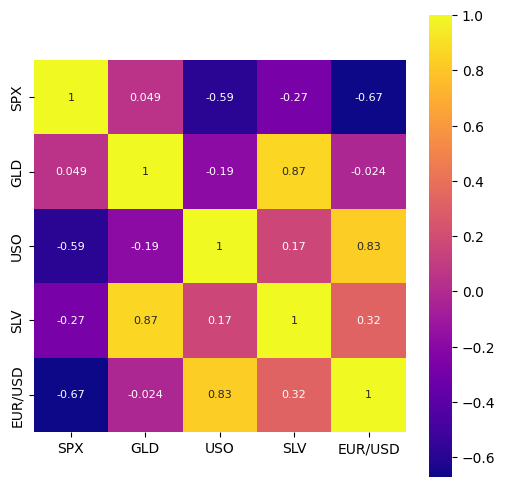

In [13]:
# constructing a heatmap to undestand the co-relation
numeric_columns = gold_data.select_dtypes(include=[np.number])

# Use the corr() method to calculate the correlation matrix
correlation = numeric_columns.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size": 8},cmap="plasma")
plt.show()

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [15]:
#we can check the + and -ve relation betwenn different objects


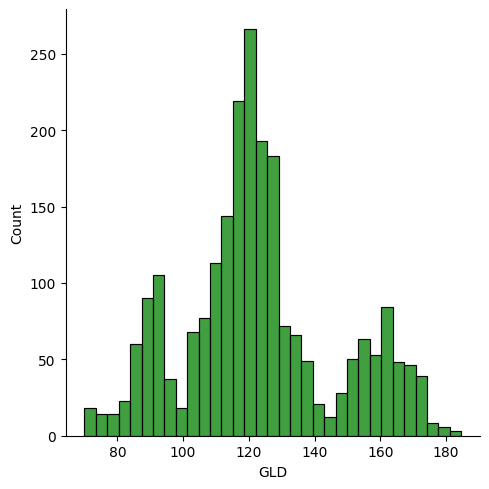

In [16]:
sns.displot(gold_data['GLD'],color='green')

In [17]:
# now we split the data 

In [18]:
gold_data = pd.read_csv('gld_price_data.csv')
X = gold_data.drop(['Date','GLD'],axis=1)
y =gold_data['GLD']

In [19]:
X.shape

(2290, 4)

In [20]:
# now we train the model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

print("-------------------------------------")
print(pred)

-------------------------------------
[122.57869948 130.7135026  127.63339982  96.60409748 118.5972007
 114.44669917 124.77240141 117.65539916 107.99190088  98.3279997
  95.29349925 167.44789799 150.04230057 116.32830021 170.72210149
  85.00069932 123.19019865 109.26699741 113.02910075 131.7223028
 124.27379899 113.69350088 115.83130023 108.89949951 108.59630126
 125.80929942 119.3917997  112.35069929 113.37390134 125.47139913
 146.36190147  89.34940003 167.47200029 113.61079965 108.37850098
 120.13130113 141.69759873 161.26860055 173.75599768 153.13220186
 119.34190106 113.37880027 121.33429963 113.66399929 122.06290017
 108.01460075  88.63479883 114.34899949 129.8187019  118.04350089
 103.52570007 129.95690183 107.11399846 160.7641037  132.03090013
 118.55709986 146.83450039 136.03040223  95.81330108 124.57280181
 115.22529875  86.00630082 104.29939928 114.08840102  84.06139898
 122.31210062 116.67419901 113.57360189 165.43780271  92.34080024
  80.30760096 160.92290119 158.75210154 1

In [29]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [33]:
regressor = RandomForestRegressor(n_estimators=100)


In [34]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.25849886  81.93810014 116.17589999 127.65120053 120.71670159
 154.82059812 150.50829902 126.08470047 117.54619866 126.00490057
 116.68610073 171.89050094 141.99019842 167.91109846 115.13369971
 117.26510031 138.70400239 169.73720085 159.42330243 156.35409961
 155.04739983 125.71100026 176.44359977 156.90840363 125.24810054
  94.04180017  77.78120008 120.4876998  119.12019911 167.48659976
  88.22890045 125.18999966  91.25490059 117.77810007 121.04119917
 135.58550012 115.60250129 115.04070062 147.63050008 107.08940105
 104.42190217  87.20019801 126.61320063 117.87419991 152.77759905
 119.56339997 108.32050014 108.17929832  93.16770015 127.11929765
  74.56400079 113.69989907 121.33230016 111.17049954 118.98759888
 120.49939945 159.56769981 168.47680115 146.89699721  85.72609864
  94.16110042  86.71639928  90.68180009 118.82570072 126.40020056
 127.51440002 168.91350074 122.31439917 117.37289901  98.40080005
 168.53600134 142.86429816 131.97700233 121.03610226 120.85899958
 119.69160

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892816243990393


In [38]:
Y_test = list(Y_test)

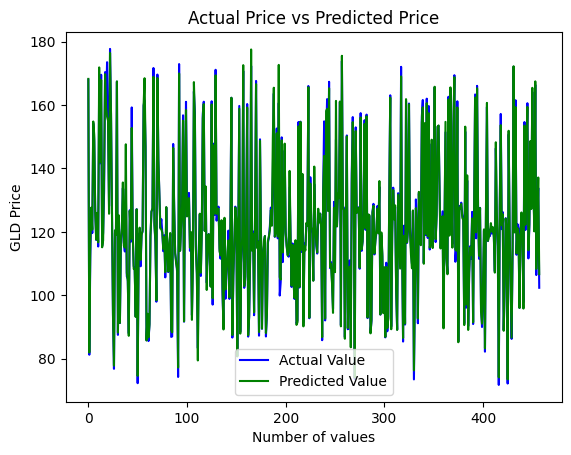

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# with this we can sya that the predicted vales ar